NAME: __________________        CLASS: __________________     DATE: __________________

# Earth's Atmosphere

© Dimitrios Theodorakis GNU General Public License v3.0 
https://github.com/DimitriosAstro/Astronomy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

### AIM - Explore the Earth's atmospheric structure and the International Standard Atmosphere (ISA) model
Difficulty: Medium

**Predict**

Have a think about these questions and make some predictions! Be sure to tell someone else what you predict.

1) How does temperature vary with height in the atmosphere?  
2) Where does the atmosphere end and space begin?  
3) How many layers are there in the atmosphere?

**Enter your predictions:**    
1)    
2)    
3)    

## Contents

* [Start - Temperature vs Altitude](#Start)
* [Pressure vs Altitude](#Pressure)
* [Density vs Altitude](#Density) 
* [Speed vs Altitude](#Speed)
* [Question Answers](#Answers)
* [Challenges](#Challenges)
* [References](#References)

# Let's go: The ISA <a class="anchor" id="Start"></a>

The atmosphere consists of five layers, the Troposphere, the Stratosphere, the Mesosphere, the Thermosphere, and the Exosphere. You might also see another layer mentioned online called the ionosphere which is the part of the atmosphere that is ionised. The Troposphere is where most commercial aviation occurs, the Stratosphere contains the Ozone layer, the highest clouds (Noctilucent clouds) are found in the Mesosphere, and the International Space Station orbits in the Thermosphere. 

The data file **int_std_atm.csv** contains data for the international standard atmosphere model. This model tells us how the temperature, denisty, pressure, and viscosity of the atmosphere change with altitude. It is a standard model of the atmosphere that measurements can be compared to. Load the model file below and use the ```head()``` function to see what's inside:

In [2]:
file = 'int_std_atm.csv'
df = pd.read_csv(file)
df.head()

,layer,level_name,h,z,lapse_rate,T,P,rho
0,0,Troposhere,-610,-611,6.5,19.0,108900.00,1.2985
1,1,Tropopause,11000,11019,0.0,-56.5,22632.00,0.3639
2,2,Stratosphere,20000,20063,-1.0,-56.5,5474.90,0.0880
3,3,Stratosphere,32000,32162,-2.8,-44.5,868.02,0.0132
4,4,Stratopause,47000,47350,0.0,-2.5,110.91,0.0020


Notice that there are extra levels in the csv. The Tropopause is the boundary between the Troposhere and the Stratosphere and so on. $h$ is the geopotential altitude above mean sea level (MSL) and $z$ is the geometric altidude above MSL. $h$ can be thought of as a gravity adjusted altitude. Since the value of the gravitational acceleration $g$ is not constant over the surface of the Earth or as you increase your altitude we use the adjusted height to define the boundaries between layers. Think of it this way, the altitude $z$ at which the Tropopause is found changes based on your position on the Earth because $g$ is not constant. By converting to $h$ the Tropopause is at the same altitude at every point on the Earth. You can convert from one to the other by using the following equations:

$$g(\phi,z) \approx 9.80665\ (1-0.00259\ cos(2\phi))\ (1-3.14\times10^{-7}\ z)$$

$$h \approx \frac{g(\phi,z)\ z}{9.80665}$$

The lapse rate is the decrease in temperature in degrees per kilometre. $T$ is the temperature at the base of the layer. $P$ and $rho$ are the pressure and density at the base of the layer respectively.

Let's try and visualise the temperature profile of the atmosphere up to the Thermosphere using the ISA. You will need the lapse rate equation:

$$T=T_o - L\times h$$

The new temperature is the base temperature $T_o$ minus the lapse rate times the geopotential altitude.

Complete the code block below to construct an array of heights and an array of temperatures for each layer of the atmosphere which we will then join together:

(-0.61, 84.851)

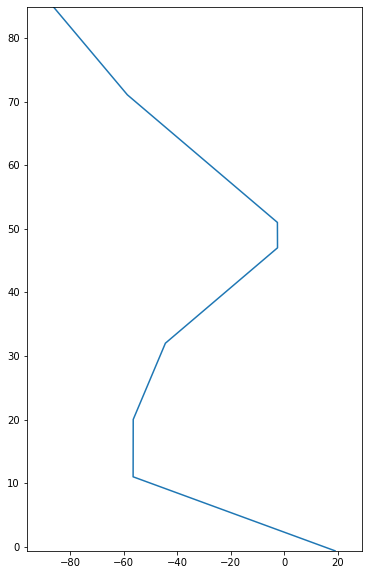

In [3]:
# first get the h, lapse_rate, and T values from the df
# Your code here:
h = df['h'].values
lapse = '''Your code here'''
T = '''Your code here'''

heights = []
temps = []

# construct temps from lapse rates
# loop over the layers but not the last one which is just the Mesopause
for i in range(len(h)-1):
    # the res just says we want our array to go up in steps of 1 m
    res = 1 # m - lower than 1000
    # get the base height from h
    # get the next base height from h
    # Your code here:
    base_h = '''Your code here'''
    next_base_h = '''Your code here'''
    # get the base temperature and the lapse rate
    # Your code here:
    base_T = '''Your code here'''
    this_lapse = '''Your code here'''
    # create an array of heights starting at base_h to next_base_h in steps of res
    # Your code here:
    new_heights = np.arange('''Your code here''', '''Your code here''', '''Your code here''')
    # these next two lines set up the empty array for temperatures
    size = len(new_heights)
    new_temps = np.zeros((size))
    for j in range(size):
        # use the lapse rate equation to update the next temp
        # hint: res*j will give you the height in metres above the base_h (don't forget to convert to km)
        # Your code here:
        new_temps[j] = '''Your code here'''
    heights.append(new_heights)
    temps.append(new_temps)

all_heights = np.concatenate(heights)/1000 # now in km
all_temps = np.concatenate(temps)

fig = plt.figure(num=1, figsize=(6,10))
ax = plt.subplot(111)

ax.plot(all_temps, all_heights)

ax.set_xlim(min(all_temps)-10, max(all_temps)+10)
ax.set_ylim(min(all_heights), max(all_heights))

Great now you have the temperature variation with altitude for the atmosphere. Notice how it cools then warms and cools again! The stratosphere contains the Ozone layer which absorbs UV radiation. This causes it to heat up. How do we know where these changes occur though? We haven't labelled the layer boundaries! Write some code below to tidy up your plot and make it easier to read. Do one or more of the following:

- Add axis labels
- Add a title
- Add horizontal lines to show the boundaries between layers
- Add text to the plot with the layer and boundary names

One last thing to note, the ISA model does not extend into the Thermosphere or the Exosphere which is the largest layer. Here the temperature at the top of the Thermosphere (the Exobase) can reach $500\ K$ during nightime and $1000\ K$ during the daytime. These temperatures are so high because the densities of the Thermosphere and the Exosphere are very low (almost zero).

In [4]:
# tidy up your plot
# you can use ax.axhline() to plot a horizontal line, ax.text() to add text and ax.set_xlabel() to set the label etc.
# Your code here:




<a class="anchor" id="Pressure"></a>

Remember to save your plot (use ```plt.savefig()```)! Now lets look at the pressure vs altitude in the two lower levels. If you solve the hydrostatic equation, with the perfect gas law and the lapse rate equation (with a constant rate) we can get the pressure in the Troposphere. The hydrostatic equation and the perfect gas law equations are:

$$\frac{\partial P}{\partial h} = -\rho g \ ,\ \ \ P = \rho R T$$

where:

$P$ is pressure ($Pa$)  
$T$ is the temperature ($K$)  
$\rho$ is the density ($g/m^3$)  
$g$ is the gravitational acceleration ($9.8\ m/s^2$)  
$T_o$ is the standard sea level temperature ($288\ K$)  
$R$ is the gas constant for air ($287\ m^2/s^2/K$)  
$h$ is the geopotential altitude above MSL ($m$)  
and $L$ is the lapse rate ($0.0065\ K/m$)

Notice we have to be more careful with units now and use the SI units of $K$ for temperature and the lapse rate in $K/m$.
The pressure variation in the troposhere is then:

$$\frac{P}{P_o} = \left( \frac{T}{T_o}\right) ^{\frac{g}{LR}}$$

where $P_o = 101.3\ kPa$ is the pressure at MSL.

If you solve the hydrostatic equation with a constant temperature instead of lapse rate you get the pressure variation in the stratosphere:

$$\frac{P}{P_s} = e^{\frac{g\ (h_s-h)}{RT_s}}$$

where values with a subscript $s$ are for the Tropopause. Note since we got this equation by solving with constant temperature it is only valid for the portion of the Stratosphere which has a constant temperature (up to $\sim 9\ km$ above the Tropopause). If we wanted the pressure for the rest of the stratosphere we could adapt the equation we got for the pressure variation in the Troposhere but that is left as a challenge exercise for you!

Complete the code block below to calculate the pressure variation in the Troposphere and the lower Stratosphere:

In [5]:
# values for you!
g = 9.8 # m/s^2
R = 287 # m^2/s^2/K
To = 288 # K
Po = 101.3 # kPa
L = 0.0065 # K/m

# create a temperature array for the troposhere starting at To and ending at 216.6
# take the step size to be -.05 deg K
# then use it to calculate the pressures
# Your code here:
T_trop = np.arange('''Your code here''', '''Your code here''', -.05)
P_trop = '''Your code here'''

h_trop = (To - T_trop)/L # altitude values for plotting using the lapse rate equation

Ts = 216.65
Ps = min(P_trop)
hs = 11000

# now create a altitude array from hs to the top of the lower Stratosphere in steps of 1 m
# then use it to calculate the pressure in the lower Stratosphere
# Your code here:
h_strat = np.arange('''Your code here''', hs+9000, '''Your code here''')
P_strat = '''Your code here'''

Use the code cell below to plot your results:

(0.0, 19999.0)

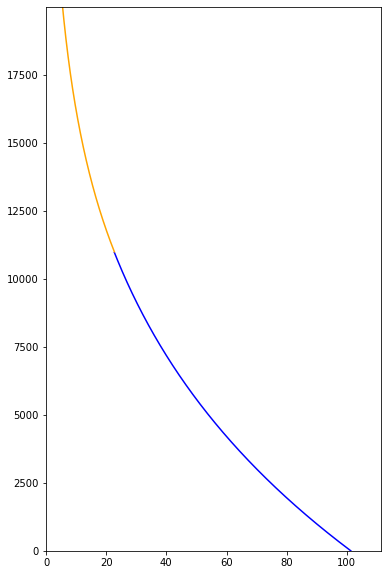

In [6]:
fig = plt.figure(num=2, figsize=(6,10))
ax = plt.subplot(111)

# plot your results! maybe make the lines different colors
# Your code here:
ax.plot('''Your code here''', '''Your code here''', '''Your code here''')
ax.plot('''Your code here''', '''Your code here''', '''Your code here''')

ax.set_xlim(0, max(P_trop)+10)
ax.set_ylim(0, max(h_strat))

# give your plot axis labels and make it easier to read like before
# Your code here:




Again don't forget to save your figure. Notice the pressure drops dramatically in the Troposhere and the pressure is almost zero by the time you get to the top of the Stratosphere (which remember isn't shown here but I challenge you to calculate and plot the rest of the pressures).

<a class="anchor" id="Density"></a>

Using the perfect gas law you can calculate the density variation with altitude (if you know the temperature and pressure). Complete the following code block to calculate the density variation with altitude for the Troposhere:

(0.0, 10976.923076925574)

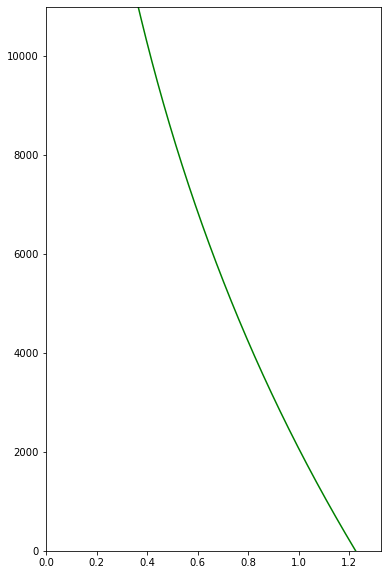

In [7]:
# Your code here:
rho_trop = '''Your code here'''

# set up a new figure and axis
fig = '''Your code here'''
ax = '''Your code here'''

ax.plot(rho_trop, h_trop, 'green')

ax.set_xlim(0, max(rho_trop)+.1)
ax.set_ylim(0, max(h_trop))

# give your plot axis labels and make it easier to read like before
# Your code here:




<a class="anchor" id="Speed"></a>

You should see the density drops rapidly. At an altitude of $5.5\ km$ you are above fifty percent of the atmosphere, at $16\ km$ you are above ninety percent of the atmosphere! Finally let's calculate the speed of sound and see how it varies with altitude. The speed of sound equation is:

$$a = \sqrt{\gamma R T}$$

where $\gamma$ is the ratio of specific heats of air and is equal to $1.4$. Complete the code block below to calculate the speed for the first three layers (similar to the first plot):

(-0.61, 84.851)

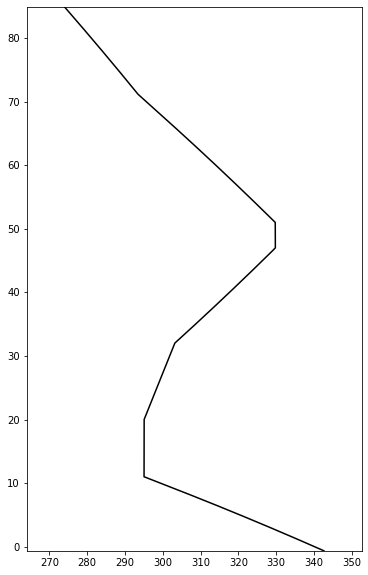

In [8]:
# use the all_temps array but convert it to Kelvin first (+273.15)
# Your code here:
a = '''Your code here'''

fig = '''Your code here'''
ax = '''Your code here'''

ax.plot(a, all_heights, 'k')

ax.set_xlim(min(a)-10, max(a)+10)
ax.set_ylim(min(all_heights), max(all_heights))

# tidy up the plot and make it more readable
# Your code here:




Again when you're ready save your plot. If you haven't already check out the Planetary Atmospheres activity to learn about the chemical composition of the atmosphere and the Planetary Interiors activity to show you how to plot a scale figure of the Earth including the atmospheric layers.

You might also like to read [this](https://climate.nasa.gov/news/2919/earths-atmosphere-a-multi-layered-cake/) NASA article on the atmosphere which describes each layer, what forms/travels in it, and discusses the Karman line (the point where the atmosphere is defined to have ended) and the particle cloud that extends past it!

# Challenge <a class="anchor" id="Challenges"></a>

1) Calculate the Pressure and Density to the top of the Mesosphere and plot them.  
2) Make your plots more readable - check out one of mine by loading it in the last cell block.  
3) Correct the air density based on humidity see [here](http://www-mdp.eng.cam.ac.uk/web/library/enginfo/aerothermal_dvd_only/aero/atmos/atmos.html).

# References <a class="anchor" id="References"></a>

AMS - Geopotential Height [http://glossary.ametsoc.org/wiki/Geopotential_height](http://glossary.ametsoc.org/wiki/Geopotential_height)  
Mick Pope - Geopotential Height [https://www.youtube.com/watch?v=doQUsfrxV_Q](https://www.youtube.com/watch?v=doQUsfrxV_Q)  
AMS - Acceleration due to Gravity [http://glossary.ametsoc.org/wiki/Acceleration_of_gravity](http://glossary.ametsoc.org/wiki/Acceleration_of_gravity)  
AMME, Univeristy of Sydney (2006) Properties of the Atmosphere [http://www-mdp.eng.cam.ac.uk/web/library/enginfo/aerothermal_dvd_only/aero/atmos/atmos.html](http://www-mdp.eng.cam.ac.uk/web/library/enginfo/aerothermal_dvd_only/aero/atmos/atmos.html)  
ISA (wikipedia) [https://en.wikipedia.org/wiki/International_Standard_Atmosphere](https://en.wikipedia.org/wiki/International_Standard_Atmosphere)  
Solar Center, Stanford - Solar Flares and the Ionosphere [http://solar-center.stanford.edu/SID/activities/ionosphere.html](http://solar-center.stanford.edu/SID/activities/ionosphere.html)  
North Carolina Climate Office - Structure of the Atmosphere [https://climate.ncsu.edu/edu/Structure](https://climate.ncsu.edu/edu/Structure)  
NASA, Earth's Atmosphere: A multi-layered cake [https://climate.nasa.gov/news/2919/earths-atmosphere-a-multi-layered-cake/](https://climate.nasa.gov/news/2919/earths-atmosphere-a-multi-layered-cake/)

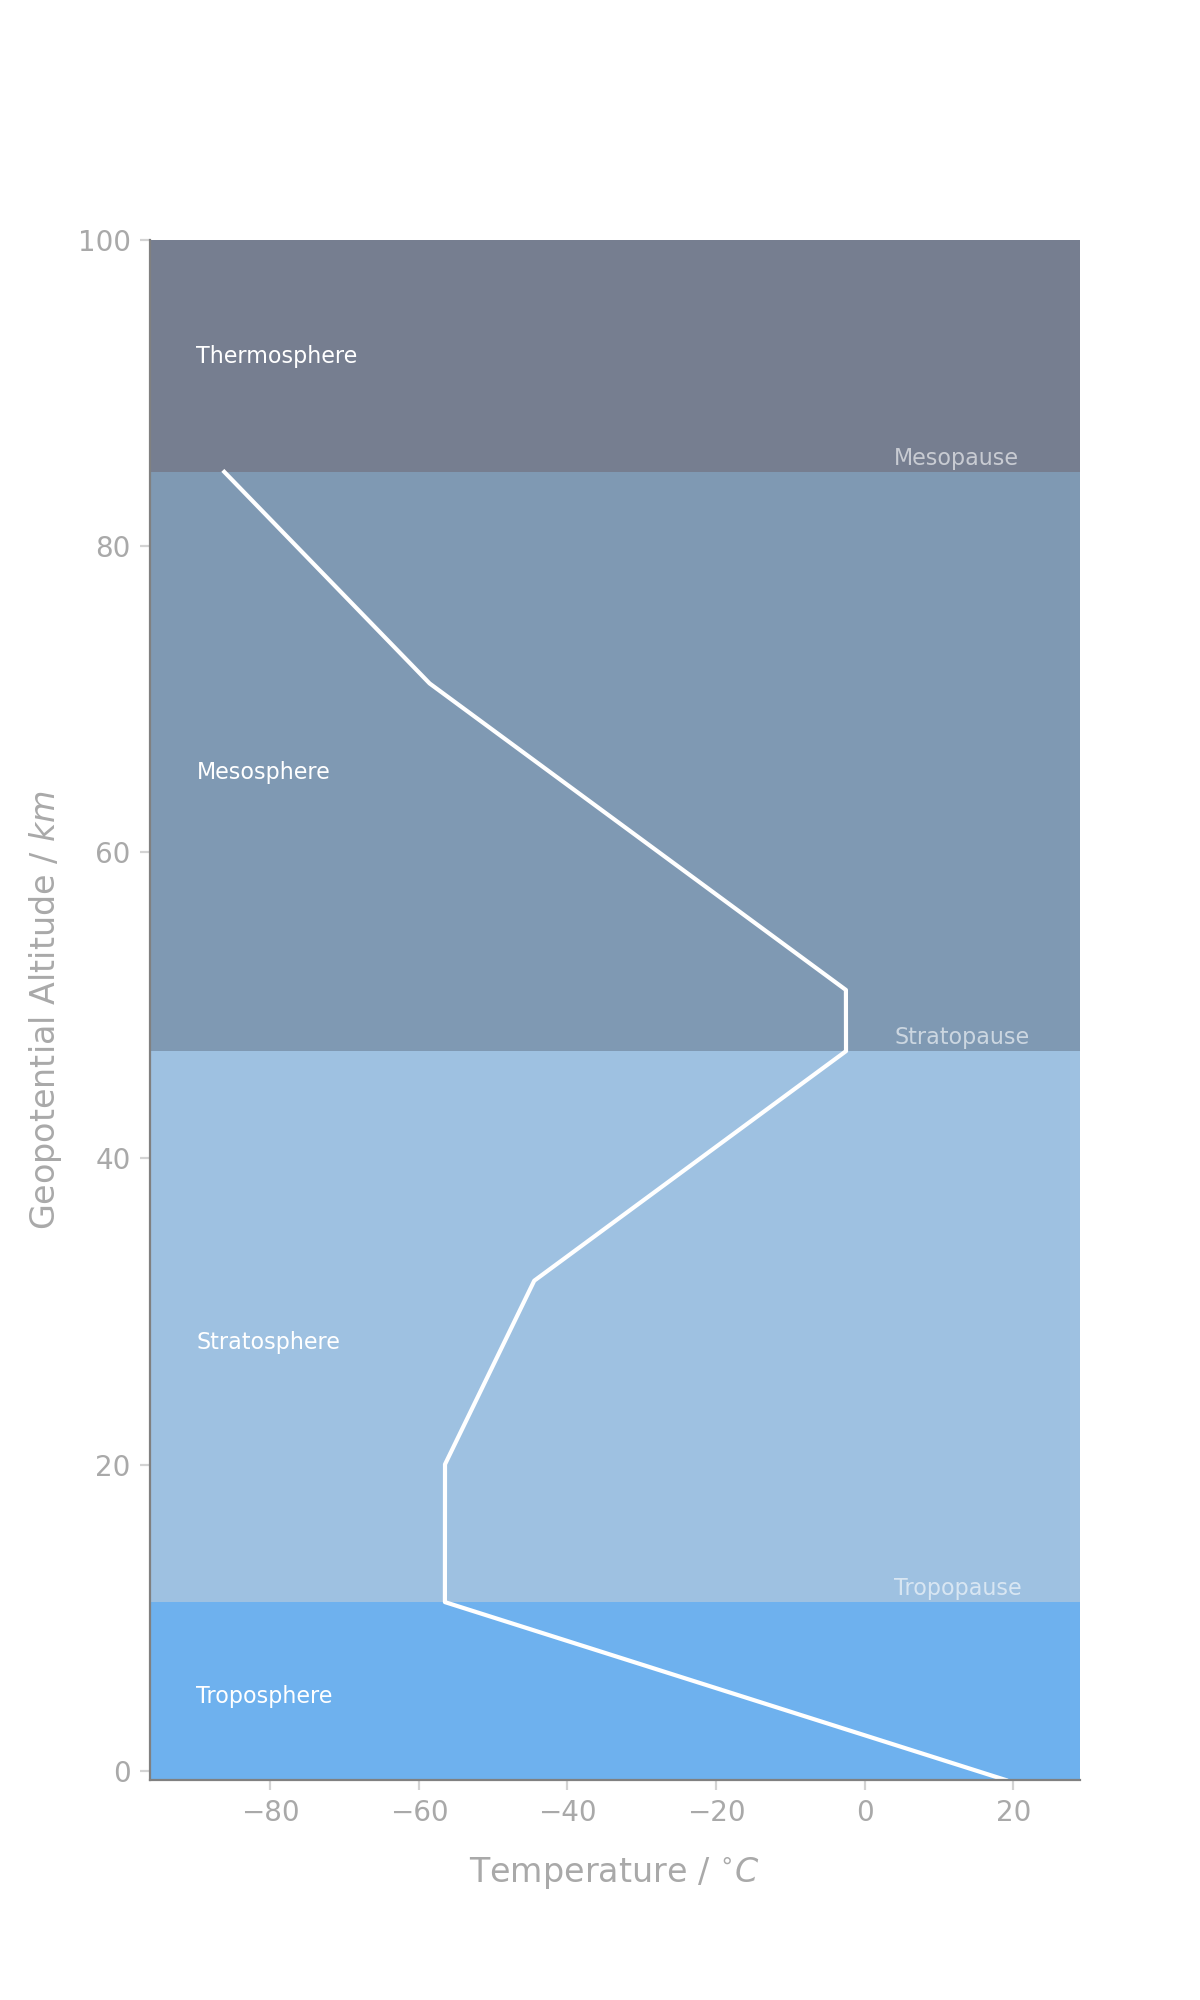

In [9]:
Image('int_std_atm.png')